# Import dependencies

In [106]:
import os
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
import seaborn as sns
from sklearn.metrics import r2_score
from scipy.stats import linregress


# Data Cleaning

In [43]:
# Read in the csv file
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [44]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [46]:
# Cleaning data
# Drop the NaN values
cleaned_df = df.dropna()

# BMI Column
# Replace "N/A" with median in the 'bmi' column
median_bmi = df['bmi'].median()
df['bmi'] = df['bmi'].fillna(median_bmi)

# Drop rows with missing values in the 'bmi' column
df_cleaned = df.dropna(subset=['bmi'])

# Gender Column
# Drop rows with 'Other' in the 'gender' column
df = df[df['gender'] != 'Other']

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   object 
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   object 
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                5109 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 518.9+ KB


# Visualisations

Exploration of which features are more likely to influence a patient having a stroke

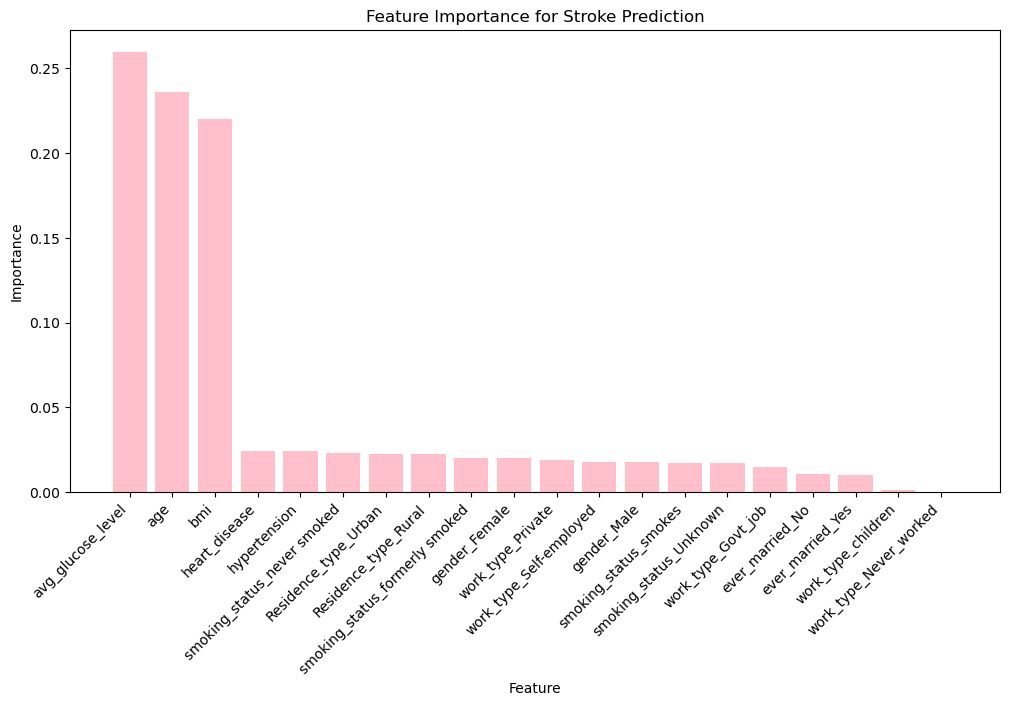

In [56]:
# Assume 'stroke' is the target variable
X = df.drop(['id', 'stroke'], axis=1)
y = df['stroke']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use RandomForestClassifier for feature importance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Get feature names
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='pink')
plt.title('Feature Importance for Stroke Prediction')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.show()

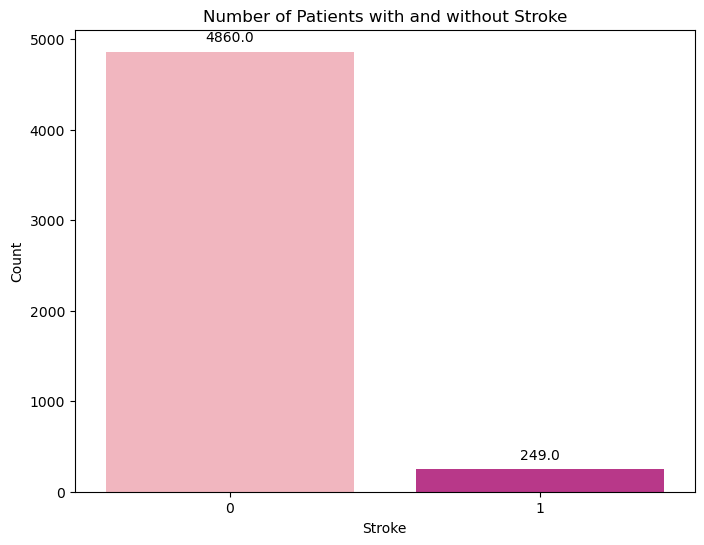

In [86]:
# Create a count plot for the 'stroke' variable
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='stroke', data=df, palette='RdPu')
plt.title('Number of Patients with and without Stroke')
plt.xlabel('Stroke')
plt.ylabel('Count')

# Annotate the bars with counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()
plt.show()

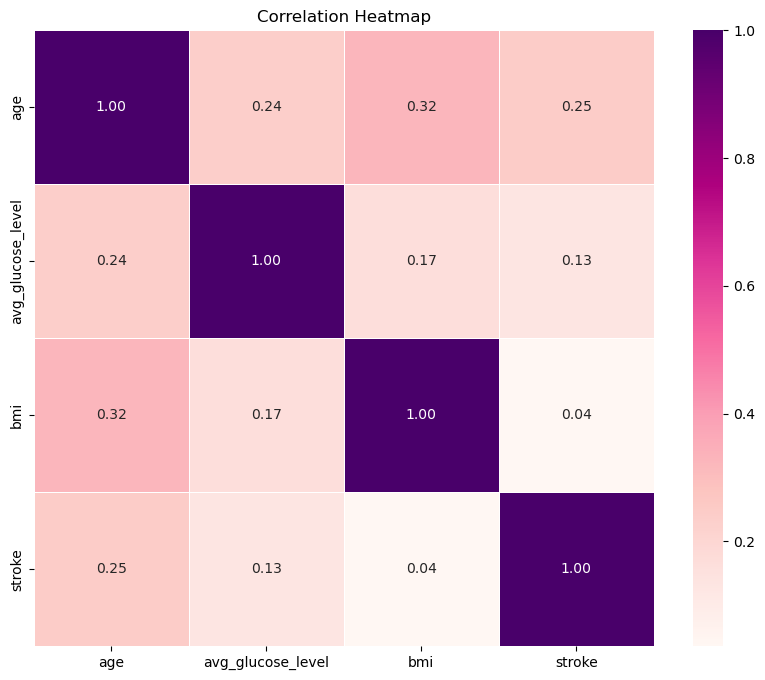

In [118]:
# Select relevant columns for correlation
correlation_data = df[['age', 'avg_glucose_level', 'bmi', 'stroke']]

# Calculate correlation matrix
correlation_matrix = correlation_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdPu', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# Age vs stroke incidence
In this section, we examine the association between age and stroke risk. Through visualizations and statistical insights, we explore how age influences the likelihood of experiencing a stroke, shedding light on key patterns and distributions within our dataset

## Histogram for the distribution of strokes

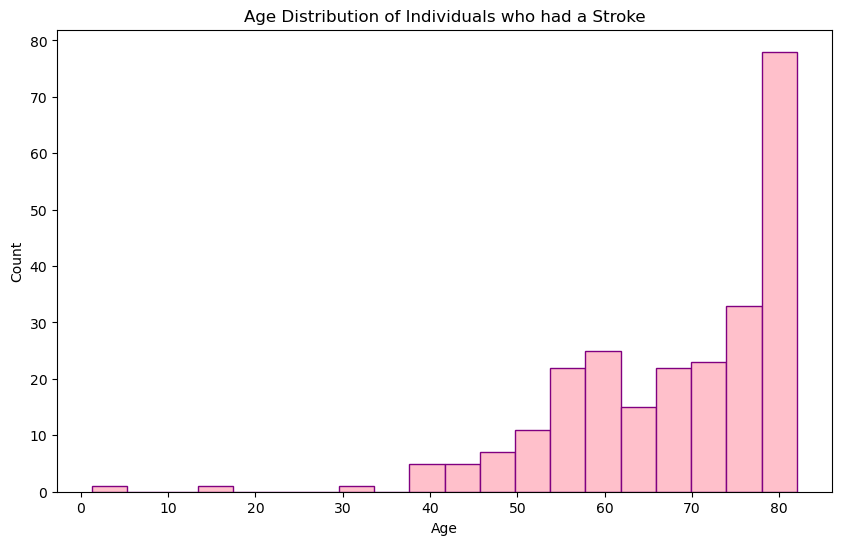

In [55]:
# Filter data to include only those who had a stroke
stroke_data = df[df['stroke'] == 1]

# Age distribution for individuals who had a stroke
plt.figure(figsize=(10, 6))
plt.hist(stroke_data['age'], bins=20, color='pink', edgecolor='purple')
plt.title('Age Distribution of Individuals who had a Stroke')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [88]:
# Filter data to include only those who had a stroke
stroke_data = df[df['stroke'] == 1]

# Descriptive statistics for age
age_stats = stroke_data['age'].describe()

age_stats

count    249.000000
mean      67.728193
std       12.727419
min        1.320000
25%       59.000000
50%       71.000000
75%       78.000000
max       82.000000
Name: age, dtype: float64

## Maliha Age Distribution code

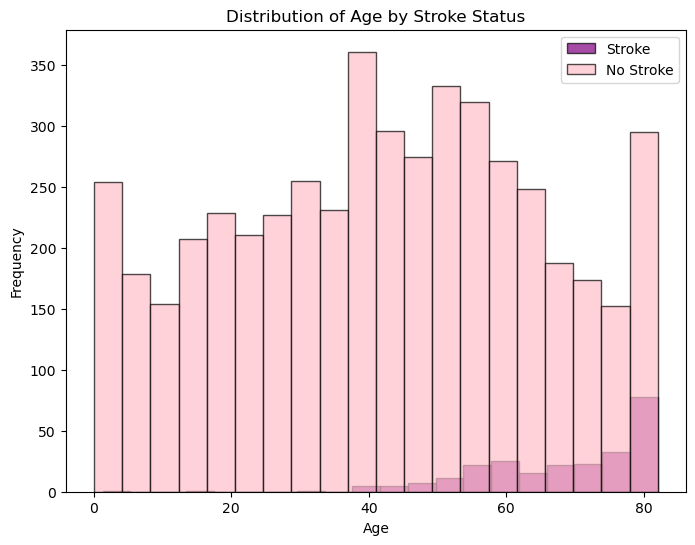

In [98]:
#Distribution of age vs stroke status
stroke_data = df[df['stroke'] == 1]['age'].dropna()
no_stroke_data = df[df['stroke'] == 0]['age'].dropna()
# Plotting the histograms
plt.figure(figsize=(8, 6))
plt.hist(stroke_data, bins=20, color='purple', alpha=0.7, label='Stroke', edgecolor='black')
plt.hist(no_stroke_data, bins=20, color='pink', alpha=0.7, label='No Stroke', edgecolor='black')
# Title and Labels
plt.title('Distribution of Age by Stroke Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
# Legend
plt.legend()
# Show the plot
plt.show()

## Line Plot of Age and Stroke Proportion

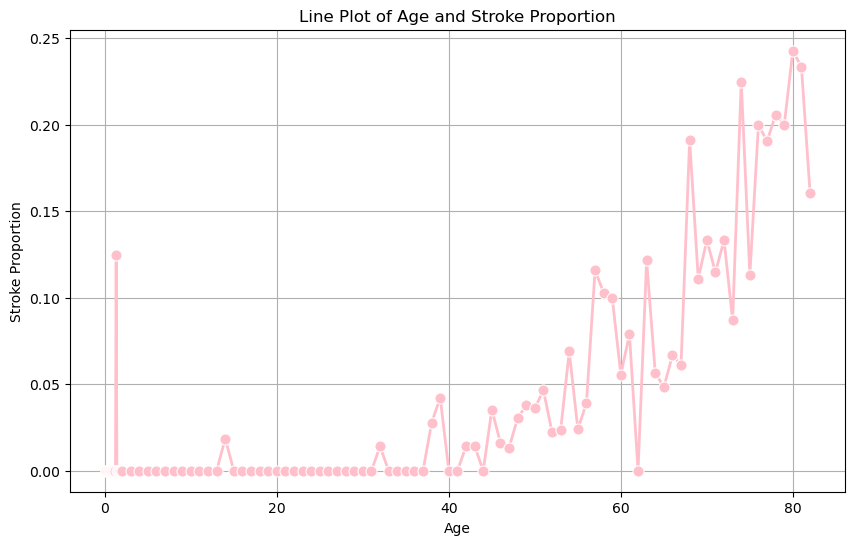

In [73]:
age_stroke_proportion = df.groupby('age')['stroke'].mean().reset_index()

# Set a custom color palette
pink_palette = sns.color_palette("RdPu")

# Set Seaborn palette
sns.set_palette(pink_palette)

# Create a line plot for the relationship between age and stroke proportion
plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='stroke', data=age_stroke_proportion, marker='o', markersize=8, color='pink', linewidth=2)
plt.title('Line Plot of Age and Stroke Proportion')
plt.xlabel('Age')
plt.ylabel('Stroke Proportion')
plt.grid(True)
plt.show()

## Box plot for age and stroke

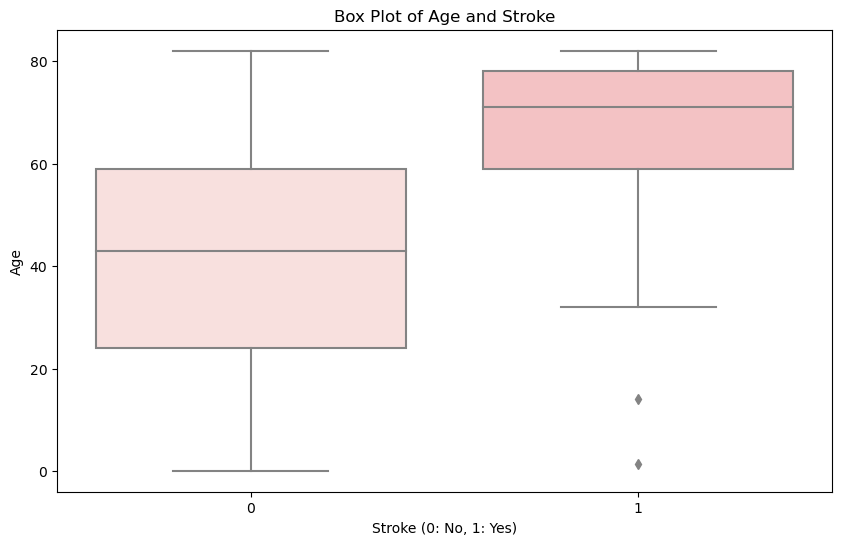

In [76]:
# Create a box plot for age and stroke
plt.figure(figsize=(10, 6))
sns.boxplot(x='stroke', y='age', data=df, palette=pink_palette)
plt.title('Box Plot of Age and Stroke')
plt.xlabel('Stroke (0: No, 1: Yes)')
plt.ylabel('Age')
plt.show()

In [77]:
# Calculate summary statistics for age with and without strokes
age_summary_with_stroke = df[df['stroke'] == 1]['age'].describe()
age_summary_without_stroke = df[df['stroke'] == 0]['age'].describe()

# Display the summary statistics
print("With Stroke:")
print(age_summary_with_stroke)
print("\nWithout Stroke:")
print(age_summary_without_stroke)

With Stroke:
count    249.000000
mean      67.728193
std       12.727419
min        1.320000
25%       59.000000
50%       71.000000
75%       78.000000
max       82.000000
Name: age, dtype: float64

Without Stroke:
count    4860.000000
mean       41.974831
std        22.293056
min         0.080000
25%        24.000000
50%        43.000000
75%        59.000000
max        82.000000
Name: age, dtype: float64


Individuals with a stroke, on average, are older than those without a stroke, as indicated by the higher mean age.

The age distribution among individuals with a stroke is narrower, with a lower standard deviation, suggesting less variability in age within this group.

The minimum age values for both groups (1.32 and 0.08) seem unusually low and may warrant further investigation, as they might be outliers or errors in the data.

# Gender vs stroke incidence
In this section, we explore the relationship between gender and stroke incidence. Through visualizations and statistical summaries, we examine the distribution of strokes across different genders in our dataset. This analysis aims to uncover any potential patterns or variations in stroke occurrences based on gender, providing valuable insights into the gender-specific dynamics of stroke risk within our study population.

## Pie chart for gender distribution of confirmed strokes

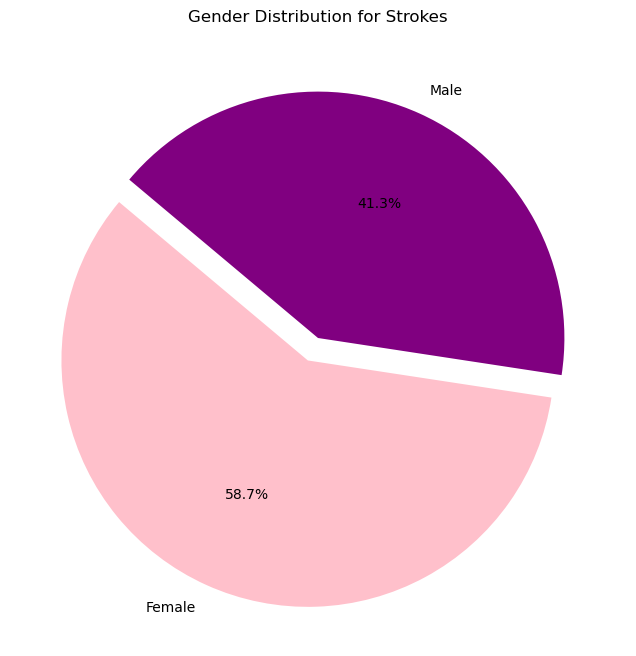

In [91]:
# Gender distribution for strokes as a pie chart
plt.figure(figsize=(8, 8))
stroke_by_gender = stroke_data['gender'].value_counts()
colors = ['pink', 'purple']
explode = (0.1, 0)  # explode the 1st slice (Female) for emphasis

plt.pie(stroke_by_gender, labels=stroke_by_gender.index, autopct='%1.1f%%', colors=colors, explode=explode, startangle=140)
plt.title('Gender Distribution for Strokes')
plt.show()


## Bar chart for gender distribution for stroke vs non-stroke

<Figure size 800x600 with 0 Axes>

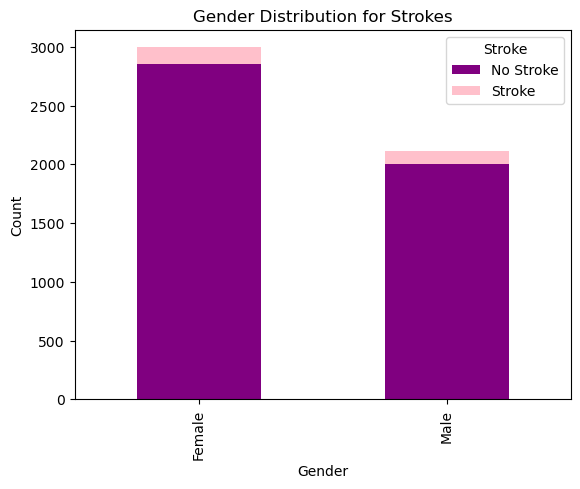

In [60]:
# Plot a bar chart
plt.figure(figsize=(8, 6))
stroke_by_gender = df.groupby(['gender', 'stroke']).size().unstack()
stroke_by_gender.plot(kind='bar', stacked=True, color=['purple', 'pink'])
plt.title('Gender Distribution for Strokes')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.show()

# BMI vs stroke incidence
In this section, we investigate the association between Body Mass Index (BMI) and stroke incidence. Utilizing visualizations and statistical summaries, we explore the distribution of strokes across various BMI categories within our dataset. This analysis aims to reveal insights into how BMI influences the likelihood of experiencing a stroke, shedding light on the relationship between body weight and stroke risk in our study population

## Scatter Plot of BMI versus Age for Individuals with Stroke

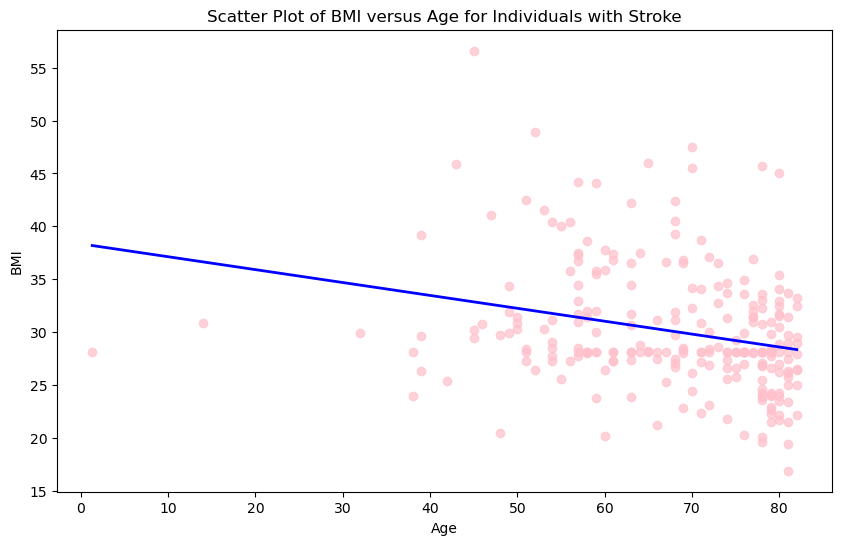

In [61]:
# Filter data for only those who had a stroke
stroke_data = df[df['stroke'] == 1]

# Scatter plot of BMI versus age with red color for data points
plt.figure(figsize=(10, 6))
plt.scatter(x=stroke_data['age'], y=stroke_data['bmi'], color='pink', alpha=0.7)

# Line of best fit (regression line)
slope, intercept = np.polyfit(stroke_data['age'], stroke_data['bmi'], 1)
x_vals = np.linspace(min(stroke_data['age']), max(stroke_data['age']), 100)
plt.plot(x_vals, slope * x_vals + intercept, color='blue', linewidth=2, label='Line of Best Fit')

plt.title('Scatter Plot of BMI versus Age for Individuals with Stroke')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

'Line Equation: y = -0.12x + 38.35\nR-squared: 0.0701'

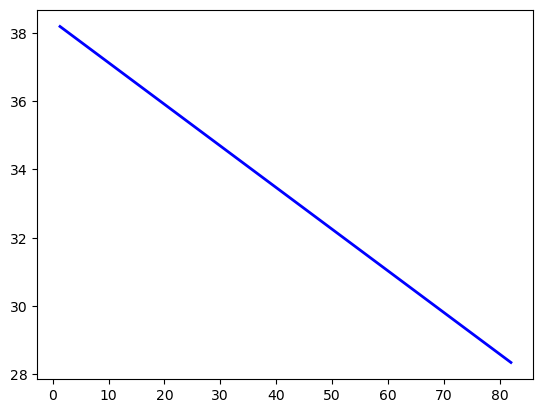

In [114]:
# Line of best fit (regression line)
slope, intercept, r_value, p_value, std_err = linregress(stroke_data['age'], stroke_data['bmi'])  # Corrected here
x_vals = np.linspace(min(stroke_data['age']), max(stroke_data['age']), 100)
plt.plot(x_vals, slope * x_vals + intercept, color='blue', linewidth=2, label='Line of Best Fit')

# Display the line equation and R-squared value
equation = f'Line Equation: y = {slope:.2f}x + {intercept:.2f}\nR-squared: {r_value**2:.4f}'
equation

Weak linear relationship: The low R-squared value indicates a weak linear association between Age and BMI for individuals with a stroke. This means that the age alone is not a strong predictor of BMI, and there might be other factors influencing BMI that are not captured by the linear relationship with age.

## BMI Category Distribution by Stroke Status

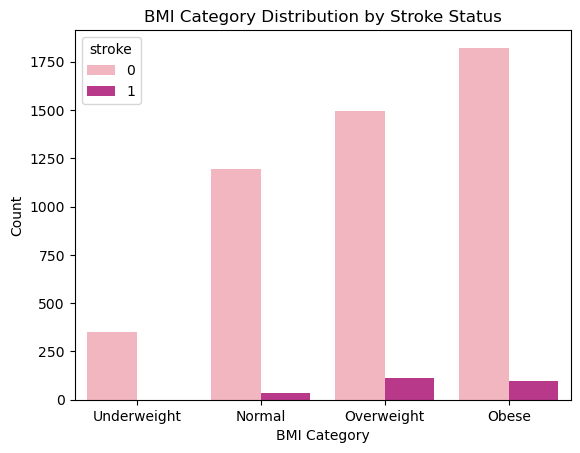

In [62]:
# Exploration of BMI categories
df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 24.9, 29.9, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
sns.countplot(x='bmi_category', hue='stroke', data=df, palette='RdPu')
plt.title('BMI Category Distribution by Stroke Status')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.show()


## Box Plot for BMI distribution and Stroke Status

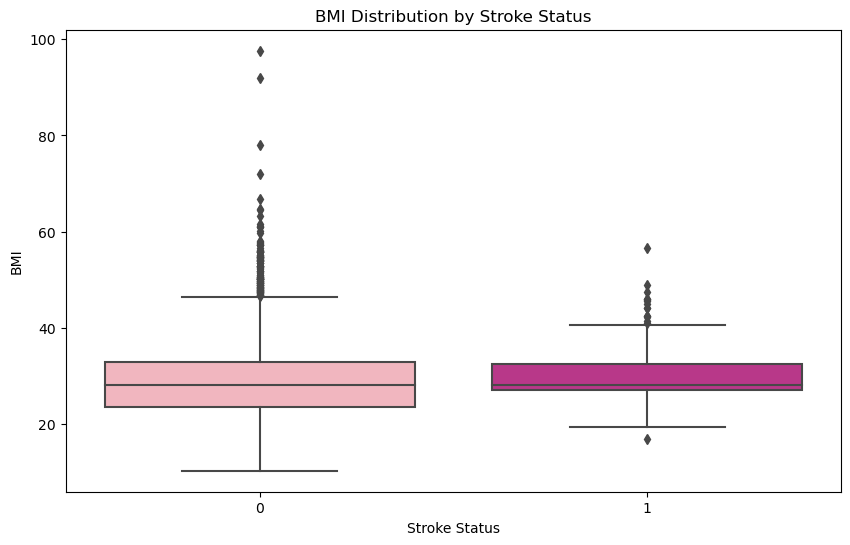

In [65]:
# Create a box plot for bmi and stroke
plt.figure(figsize=(10, 6))
sns.boxplot(x='stroke', y='bmi', data=df, palette='RdPu')
plt.title('BMI Distribution by Stroke Status')
plt.xlabel('Stroke Status')
plt.ylabel('BMI')
plt.show()

In [83]:
# Calculate summary statistics for bmi with and without strokes
bmi_summary_with_stroke = df[df['stroke'] == 1]['bmi'].describe()
bmi_summary_without_stroke = df[df['stroke'] == 0]['bmi'].describe()

# Display the summary statistics
print("With Stroke:")
print(bmi_summary_with_stroke)
print("\nWithout Stroke:")
print(bmi_summary_without_stroke)

With Stroke:
count    249.000000
mean      30.090361
std        5.861877
min       16.900000
25%       27.000000
50%       28.100000
75%       32.500000
max       56.600000
Name: bmi, dtype: float64

Without Stroke:
count    4860.000000
mean       28.800432
std         7.777528
min        10.300000
25%        23.600000
50%        28.100000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64


Individuals with a stroke, on average, have a slightly higher mean BMI compared to those without a stroke.

The distribution of BMI is narrower among individuals with a stroke, as indicated by the lower standard deviation, suggesting less variability in BMI within this group.

Both groups share a similar median BMI, but individuals without a stroke exhibit a wider range of BMIs, with a higher maximum observed value.

# Average Blood Sugar vs Stroke risk

## Box plot for blood sugar and stroke risk

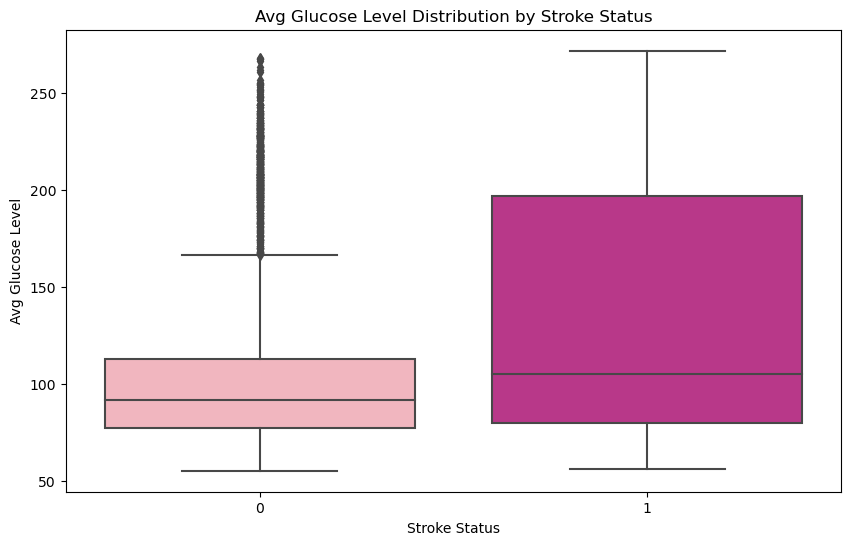

In [82]:
# Create a box plot for blood sugar and stroke
plt.figure(figsize=(10, 6))
sns.boxplot(x='stroke', y='avg_glucose_level', data=df, palette='RdPu')
plt.title('Avg Glucose Level Distribution by Stroke Status')
plt.xlabel('Stroke Status')
plt.ylabel('Avg Glucose Level')
plt.show()

In [85]:
# Calculate summary statistics for age with and without strokes
abs_summary_with_stroke = df[df['stroke'] == 1]['avg_glucose_level'].describe()
abs_summary_without_stroke = df[df['stroke'] == 0]['avg_glucose_level'].describe()

# Display the summary statistics
print("With Stroke:")
print(abs_summary_with_stroke)
print("\nWithout Stroke:")
print(abs_summary_without_stroke)

With Stroke:
count    249.000000
mean     132.544739
std       61.921056
min       56.110000
25%       79.790000
50%      105.220000
75%      196.710000
max      271.740000
Name: avg_glucose_level, dtype: float64

Without Stroke:
count    4860.000000
mean      104.787584
std        43.847095
min        55.120000
25%        77.120000
50%        91.465000
75%       112.800000
max       267.760000
Name: avg_glucose_level, dtype: float64


Individuals with a stroke, on average, have a higher mean average blood glucose level compared to those without a stroke.

The average blood glucose level distribution among individuals with a stroke is wider, with a higher standard deviation, suggesting greater variability in blood glucose levels within this group.

Both groups share a similar median average blood glucose level, but individuals with a stroke exhibit a wider range of values, with a higher maximum observed level.

## Histogram of Average Blood Sugar

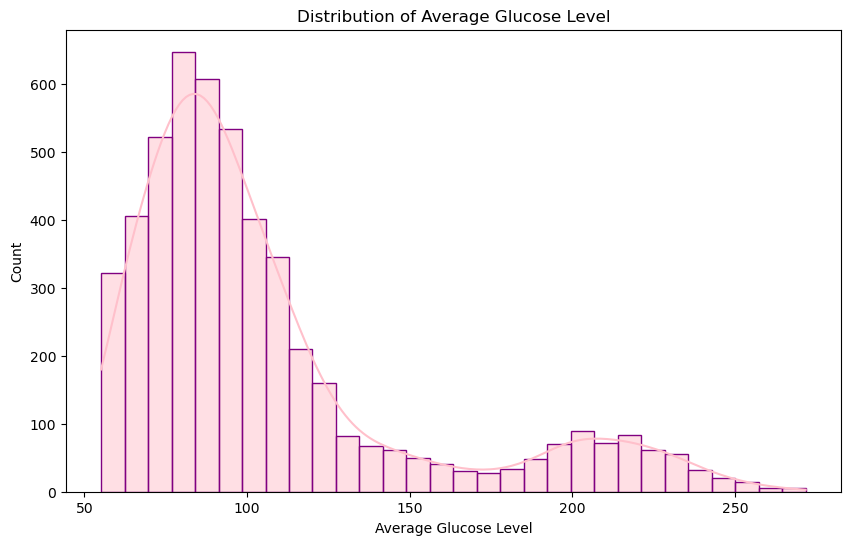

In [72]:
# Create a histogram with KDE for the distribution of average glucose level
plt.figure(figsize=(10, 6))
sns.histplot(df['avg_glucose_level'], bins=30, kde=True, color='pink', edgecolor='purple')
plt.title('Distribution of Average Glucose Level')
plt.xlabel('Average Glucose Level')
plt.ylabel('Count')
plt.show()

In [92]:
# Filter data to include only those who had a stroke
stroke_data = df[df['stroke'] == 1]

# Descriptive statistics for age
abs_stats = stroke_data['avg_glucose_level'].describe()

abs_stats

count    249.000000
mean     132.544739
std       61.921056
min       56.110000
25%       79.790000
50%      105.220000
75%      196.710000
max      271.740000
Name: avg_glucose_level, dtype: float64

## Scatter plot for Blood Sugar vs BMI stroke

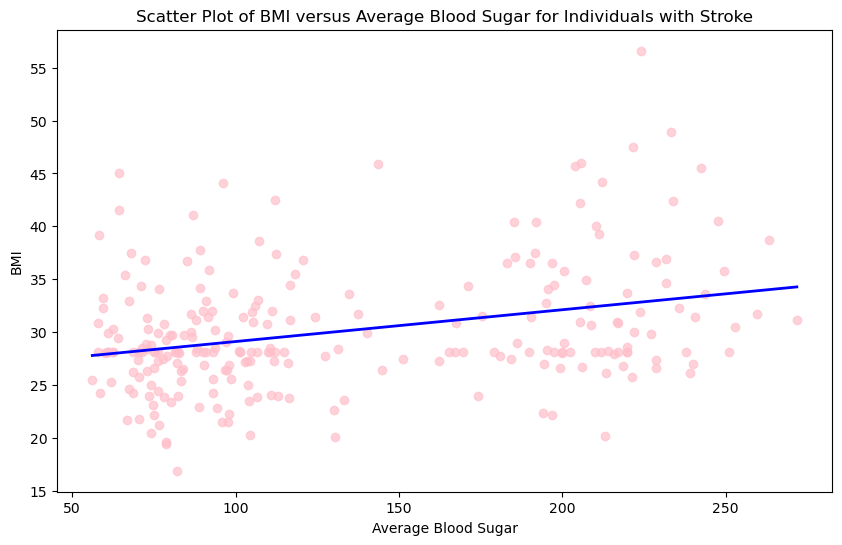

In [116]:
# Filter data for only those who had a stroke
stroke_data = df[df['stroke'] == 1]

# Scatter plot of BMI versus age with red color for data points
plt.figure(figsize=(10, 6))
plt.scatter(x=stroke_data['avg_glucose_level'], y=stroke_data['bmi'], color='pink', alpha=0.7)

# Line of best fit (regression line)
slope, intercept = np.polyfit(stroke_data['avg_glucose_level'], stroke_data['bmi'], 1)
x_vals = np.linspace(min(stroke_data['avg_glucose_level']), max(stroke_data['avg_glucose_level']), 100)
plt.plot(x_vals, slope * x_vals + intercept, color='blue', linewidth=2, label='Line of Best Fit')

plt.title('Scatter Plot of BMI versus Average Blood Sugar for Individuals with Stroke')
plt.xlabel('Average Blood Sugar')
plt.ylabel('BMI')
plt.show()

'Line Equation: x = 0.03y + 26.11\nR-squared: 0.1008'

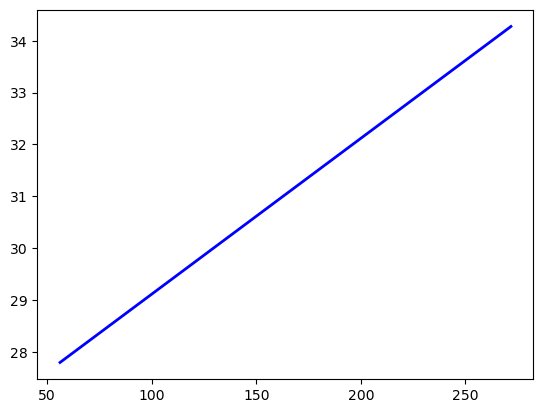

In [115]:
# Line of best fit (regression line)
slope, intercept, r_value, p_value, std_err = linregress(stroke_data['avg_glucose_level'], stroke_data['bmi'])
x_vals = np.linspace(min(stroke_data['avg_glucose_level']), max(stroke_data['avg_glucose_level']), 100)
plt.plot(x_vals, slope * x_vals + intercept, color='blue', linewidth=2, label='Line of Best Fit')

# Display the line equation and R-squared value
equation = f'Line Equation: x = {slope:.2f}y + {intercept:.2f}\nR-squared: {r_value**2:.4f}'
equation

In summary, the linear model suggests a modest positive relationship between blood sugar and BMI for individuals who had a stroke. However, the model has limited explanatory power, and other factors not considered in the model may contribute to the variability in blood sugar levels. It's essential to interpret these results cautiously and consider additional factors that may influence blood sugar.